## This is multivariate time series forecasting on the smae dataset , but the computation is heavy so we are using the local tensorflow gpu- that is my graphics card at the backend for all the computaion

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:/Users/navee/Desktop/final_data.csv')

#### droping the max and min temperature column as it is highly correlated to each other and we can make use of the avg temperature as it is showing good corelation with the total power consumption feature.

In [5]:
df.drop(columns=['Unnamed: 0','max_temp','min_temp'],inplace=True)

In [6]:
df.head()

,Time,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,AC11,AC12,AC13,AC14,AC15,AC16,AC17,AC18,avg_temp
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,55
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,55
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,55
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,55
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,55


In [7]:
df['Time']=pd.to_datetime(df['Time'],infer_datetime_format=True)

In [8]:
x=list(df.columns)
x.pop(0)
print(x)

['AC1', 'AC2', 'AC3', 'AC4', 'AC5', 'AC6', 'AC7', 'AC8', 'AC9', 'AC10', 'AC11', 'AC12', 'AC13', 'AC14', 'AC15', 'AC16', 'AC17', 'AC18', 'avg_temp']


### Generating the total power consumption by creating a column named Total

In [14]:
df['Total']=df.eval('AC1+AC2+AC3+AC4+AC5+AC6+AC7+AC8+AC9+AC10+AC11+AC12+AC13+AC14+AC15+AC16+AC17+AC18')

In [15]:
mpl.rcParams['figure.figsize']=(20,12)
mpl.rcParams['axes.grid']=False

array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>], dtype=object)

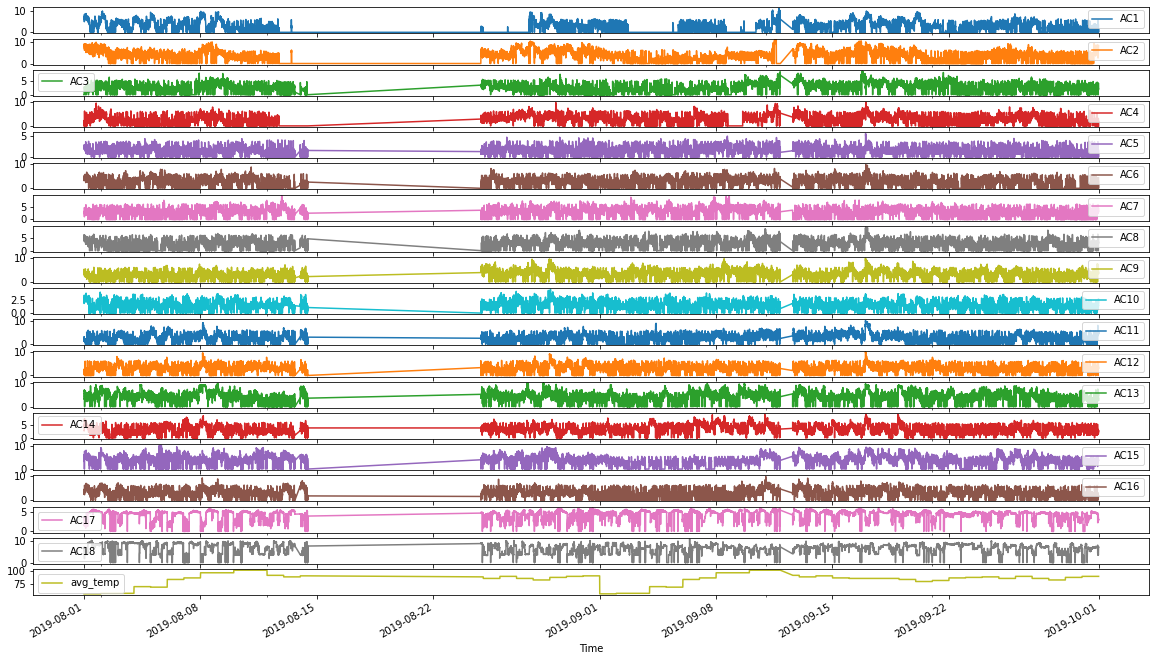

In [16]:
df.set_index('Time')[['AC1', 'AC2', 'AC3', 'AC4', 'AC5', 'AC6', 'AC7', 'AC8', 'AC9', 'AC10', 'AC11', 'AC12', 'AC13', 'AC14', 'AC15', 'AC16', 'AC17', 'AC18', 'avg_temp']].plot(subplots=True)

#### As we can see from the above graph we have 19 columns for the forecasting, ehich include all the AC's power consumption and the outside avg temperature.

In [17]:
df.describe()

,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,AC11,AC12,AC13,AC14,AC15,AC16,AC17,AC18,avg_temp,Total
count,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000
mean,2.394089,3.872065,2.504698,2.313283,1.466444,2.709061,2.945136,2.568989,3.149919,1.539393,2.486162,2.815970,4.313004,2.957060,4.124136,2.765703,4.255119,6.453815,82.934299,55.634049
std,2.309156,2.360155,1.452713,1.705811,0.748515,1.590249,1.487934,1.531968,1.534838,0.700372,1.588902,1.402622,1.872007,1.505043,2.003805,1.538245,1.078238,2.249975,12.559294,12.491201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000
25%,0.000000,2.272895,1.663072,1.279719,1.008326,1.877316,2.161931,1.766606,2.273552,1.106887,1.640117,2.066214,3.273092,1.855093,3.025756,1.867401,3.773065,4.006869,82.000000,47.642828
50%,2.081296,3.738743,2.417197,2.255593,1.408948,2.819162,2.976191,2.622136,3.046702,1.500257,2.409043,2.824786,4.239078,2.794645,4.092966,2.685934,4.624716,7.072846,86.000000,54.965027
75%,3.767716,5.334570,3.351791,3.313595,1.903034,3.742868,3.852767,3.538364,4.046424,1.977836,3.362753,3.660599,5.433044,3.892646,5.409613,3.701203,4.977744,8.252815,89.000000,62.730362
max,11.194789,11.147141,8.430909,9.849144,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,9.789502,5.950261,11.040031,101.000000,130.064581


In [25]:
x=df.drop(columns=['Time'])
x

,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,AC11,AC12,AC13,AC14,AC15,AC16,AC17,AC18,avg_temp,Total
0,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,55,65.393197
1,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,55,64.762056
2,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,55,65.791277
3,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,55,63.779666
4,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,55,61.997570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34637,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612,89,52.216810
34638,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333,89,52.445240
34639,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989,89,54.060166
34640,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647,89,52.495807


In [75]:
type(x)

pandas.core.frame.DataFrame

In [26]:
scalar=MinMaxScaler()
df_scaled=scalar.fit_transform(x)

In [28]:
features=df_scaled
target=df_scaled[:,-1]

In [35]:
TimeseriesGenerator(features,target,length=100,sampling_rate=1,batch_size=10)[0]

(array([[[0.67161889, 0.7883919 , 0.        , ..., 0.61014148,
          0.        , 0.50277483],
         [0.66335455, 0.80205458, 0.        , ..., 0.57785158,
          0.        , 0.49792231],
         [0.630024  , 0.8218343 , 0.        , ..., 0.5764001 ,
          0.        , 0.50583546],
         ...,
         [0.61098923, 0.63756309, 0.32787394, ..., 0.35445131,
          0.        , 0.52597023],
         [0.65475348, 0.62913516, 0.2553735 , ..., 0.35822823,
          0.        , 0.53340337],
         [0.66161005, 0.57443087, 0.33929411, ..., 0.35932345,
          0.        , 0.52663004]],
 
        [[0.66335455, 0.80205458, 0.        , ..., 0.57785158,
          0.        , 0.49792231],
         [0.630024  , 0.8218343 , 0.        , ..., 0.5764001 ,
          0.        , 0.50583546],
         [0.59540615, 0.81326919, 0.        , ..., 0.55501348,
          0.        , 0.49036921],
         ...,
         [0.65475348, 0.62913516, 0.2553735 , ..., 0.35822823,
          0.        , 0.

In [37]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42,shuffle=False)

In [38]:
X_train.shape

(24249, 20)

In [ ]:
#### the idle window length must be 30 as we need the prediction at hourly, and to be even more precise the 2 min window is the original window, the batch size must be 100 or 150, for the proper functioning of the model to learn the pattern, but this will increase the computation exponentially,thus we are using a window value of 720-which wi 

In [41]:
win_len=720
batch_size=32
n_features=20
train_generator=TimeseriesGenerator(X_train,y_train,length=win_len,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(X_test,y_test,length=win_len,sampling_rate=1,batch_size=batch_size)

In [42]:
train_generator[0]

(array([[[0.67161889, 0.7883919 , 0.        , ..., 0.61014148,
          0.        , 0.50277483],
         [0.66335455, 0.80205458, 0.        , ..., 0.57785158,
          0.        , 0.49792231],
         [0.630024  , 0.8218343 , 0.        , ..., 0.5764001 ,
          0.        , 0.50583546],
         ...,
         [0.56625558, 0.64085652, 0.5208403 , ..., 0.80497465,
          0.02173913, 0.61481746],
         [0.62798418, 0.53201594, 0.49866893, ..., 0.79660852,
          0.02173913, 0.62174448],
         [0.54834878, 0.55332922, 0.45452985, ..., 0.78838879,
          0.02173913, 0.61708118]],
 
        [[0.66335455, 0.80205458, 0.        , ..., 0.57785158,
          0.        , 0.49792231],
         [0.630024  , 0.8218343 , 0.        , ..., 0.5764001 ,
          0.        , 0.50583546],
         [0.59540615, 0.81326919, 0.        , ..., 0.55501348,
          0.        , 0.49036921],
         ...,
         [0.62798418, 0.53201594, 0.49866893, ..., 0.79660852,
          0.02173913, 0.

### creating lstm model for prediction of multivariate features
#### the model is just a basic model, early stopping is also applied to end the training early, so it may not generate accurate data, also the parameters are also not tuned, random values are taken just the execution is used to checked for the fine working of model.

#### As the dataset is large anf=d my computational power are limited ,the use of large dataset and tuning of the model is not possible. Thus only execution is shown here. 

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [48]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32,input_shape=(win_len,n_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(0.5))
model.add(LSTM(32,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(LSTM(16,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 720, 32)           6784      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 720, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 720, 32)           8320      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 720, 32)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 720, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 720, 16)           3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 720, 16)          

In [50]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50
736/736 [==============================] - 558s 759ms/step - loss: 0.0155 - mean_absolute_error: 0.0925 - val_loss: 0.0149 - val_mean_absolute_error: 0.1033
Epoch 2/50
736/736 [==============================] - 553s 751ms/step - loss: 0.0093 - mean_absolute_error: 0.0734 - val_loss: 0.0123 - val_mean_absolute_error: 0.0923
Epoch 3/50
736/736 [==============================] - 556s 756ms/step - loss: 0.0082 - mean_absolute_error: 0.0675 - val_loss: 0.0111 - val_mean_absolute_error: 0.0871
Epoch 4/50
736/736 [==============================] - 577s 784ms/step - loss: 0.0077 - mean_absolute_error: 0.0650 - val_loss: 0.0109 - val_mean_absolute_error: 0.0861
Epoch 5/50
736/736 [==============================] - 617s 838ms/step - loss: 0.0075 - mean_absolute_error: 0.0639 - val_loss: 0.0110 - val_mean_absolute_error: 0.0869
Epoch 6/50
736/736 [==============================] - 621s 844ms/step - loss: 0.0074 - mean_absolute_error: 0.0635 - val_loss: 0.0112 - val_mean_absolute_error:

In [51]:
model.evaluate_generator(test_generator,verbose=0)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.011202811263501644, 0.08761616051197052]

In [62]:
prediction=model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
### saving the model for future use

In [60]:
model.save('final_lstm_model.h5')

In [63]:
prediction.shape[0]

9673

In [64]:
X_test.shape

(10393, 20)

In [65]:
X_test[:,1:][win_len:]

array([[0.60870873, 0.65443696, 0.51974613, ..., 0.36777116, 0.65217391,
        0.70182195],
       [0.55570642, 0.65091128, 0.48104342, ..., 0.3671017 , 0.65217391,
        0.6856247 ],
       [0.64393037, 0.64927696, 0.48107307, ..., 0.36825064, 0.65217391,
        0.69447152],
       ...,
       [0.54923365, 0.26001914, 0.21152245, ..., 0.65760582, 0.73913043,
        0.41564095],
       [0.55193815, 0.26229925, 0.        , ..., 0.64625243, 0.73913043,
        0.40361339],
       [0.54527717, 0.22431295, 0.        , ..., 0.650335  , 0.73913043,
        0.44092501]])

In [70]:
prediction=prediction.reshape(9673,720)

### process of combining the dataset with the prediction to generate the prediction

In [71]:
df_pred=pd.concat([pd.DataFrame(prediction), pd.DataFrame(X_test[:,1:][win_len:])],axis=1)

In [73]:
df_pred

,0,1,2,3,4,5,6,7,8,9,...,9,10,11,12,13,14,15,16,17,18
0,0.412600,0.429752,0.437267,0.440370,0.441469,0.441689,0.441547,0.441290,0.441046,0.440832,...,0.776863,0.558472,0.585606,0.615913,0.891011,0.337137,0.691601,0.367771,0.652174,0.701822
1,0.412647,0.429770,0.437263,0.440358,0.441453,0.441662,0.441518,0.441284,0.441037,0.440853,...,0.768311,0.509212,0.578380,0.621655,0.889522,0.330869,0.691761,0.367102,0.652174,0.685625
2,0.412589,0.429697,0.437202,0.440313,0.441414,0.441634,0.441522,0.441288,0.441073,0.440869,...,0.791972,0.494719,0.595868,0.622598,0.833775,0.318803,0.693270,0.368251,0.652174,0.694472
3,0.412594,0.429710,0.437211,0.440309,0.441409,0.441649,0.441527,0.441318,0.441078,0.440859,...,0.834062,0.448642,0.649031,0.623090,0.884986,0.311733,0.790881,0.372329,0.652174,0.707074
4,0.412609,0.429727,0.437217,0.440314,0.441429,0.441657,0.441558,0.441322,0.441068,0.440856,...,0.868231,0.399520,0.656586,0.625580,0.848571,0.000000,0.793867,0.374591,0.652174,0.705347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9668,0.412717,0.429987,0.437585,0.440726,0.441837,0.442052,0.441885,0.441608,0.441329,0.441081,...,0.496609,0.329009,0.251565,0.312503,0.356896,0.203527,0.509131,0.652409,0.739130,0.401468
9669,0.412728,0.429993,0.437569,0.440687,0.441786,0.441974,0.441803,0.441530,0.441252,0.441037,...,0.422629,0.318051,0.310911,0.297413,0.395235,0.198667,0.512391,0.665608,0.739130,0.403225
9670,0.412712,0.429957,0.437516,0.440648,0.441731,0.441923,0.441761,0.441486,0.441234,0.441084,...,0.484386,0.319017,0.372385,0.269413,0.392533,0.189423,0.508808,0.657606,0.739130,0.415641
9671,0.412692,0.429904,0.437461,0.440574,0.441664,0.441860,0.441698,0.441452,0.441270,0.441155,...,0.499285,0.280395,0.386536,0.227502,0.392032,0.191111,0.502826,0.646252,0.739130,0.403613


In [92]:
df_final=df_scaled[prediction.shape[0]*-1:]

In [93]:
df_final=pd.DataFrame(df_final,columns=['AC1', 'AC2', 'AC3', 'AC4', 'AC5', 'AC6', 'AC7', 'AC8', 'AC9', 'AC10', 'AC11', 'AC12', 'AC13', 'AC14', 'AC15', 'AC16', 'AC17', 'AC18', 'avg_temp','Total'])

In [95]:
df_final.count()

AC1         9673
AC2         9673
AC3         9673
AC4         9673
AC5         9673
AC6         9673
AC7         9673
AC8         9673
AC9         9673
AC10        9673
AC11        9673
AC12        9673
AC13        9673
AC14        9673
AC15        9673
AC16        9673
AC17        9673
AC18        9673
avg_temp    9673
Total       9673
dtype: int64

In [96]:
df_final['pred']=prediction[:,0]

In [101]:
df_final.head()

,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,...,AC12,AC13,AC14,AC15,AC16,AC17,AC18,avg_temp,Total,pred
0,0.661523,0.608709,0.654437,0.519746,0.431227,0.350511,0.335065,0.494327,0.598119,0.275726,...,0.558472,0.585606,0.615913,0.891011,0.337137,0.691601,0.367771,0.652174,0.701822,0.412600
1,0.632028,0.555706,0.650911,0.481043,0.429131,0.349796,0.401248,0.425149,0.599800,0.260796,...,0.509212,0.578380,0.621655,0.889522,0.330869,0.691761,0.367102,0.652174,0.685625,0.412647
2,0.647031,0.643930,0.649277,0.481073,0.435109,0.291424,0.402475,0.469040,0.651331,0.263702,...,0.494719,0.595868,0.622598,0.833775,0.318803,0.693270,0.368251,0.652174,0.694472,0.412589
3,0.642411,0.656027,0.647783,0.480291,0.428035,0.293890,0.365159,0.550402,0.641061,0.196897,...,0.448642,0.649031,0.623090,0.884986,0.311733,0.790881,0.372329,0.652174,0.707074,0.412594
4,0.663570,0.647731,0.643976,0.471936,0.486619,0.371639,0.439693,0.557269,0.701108,0.350159,...,0.399520,0.656586,0.625580,0.848571,0.000000,0.793867,0.374591,0.652174,0.705347,0.412609


#### As expected the model could not fit well to the dataset, due to vauge value estimation, thus the pred value are almost same and not fitted to the dataset.